In [1]:
import os
import itertools
import numpy as np
import mpmath as mp
from tqdm import tqdm
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.linalg import expm
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.set_printoptions(precision=5, suppress=True, linewidth=200)
from IPython.display import display

In [2]:
k = 9.32
T_1 = 35
T_2 = 19
T_3 = 11
tau = 14

IMAGES_DIR = 'latex/pics'
os.makedirs(IMAGES_DIR, exist_ok=True)

# Розділ 3. Розрахунок періодів квантування

## 3.1. Розрахунок на умові забезпечення необхідної точності керування

$$W_{O_1}(s) = \frac{k e^{-\tau s}}{T_1 s + 1}$$

Період квантування: $T_0 = \frac{\varepsilon}{B_{\max}}$, $B_{\max} = \frac{k}{T_1}$

eps = 0.01, T_0 = 0.0376
eps = 0.02, T_0 = 0.0751
eps = 0.03, T_0 = 0.1127
eps = 0.04, T_0 = 0.1502
eps = 0.05, T_0 = 0.1878


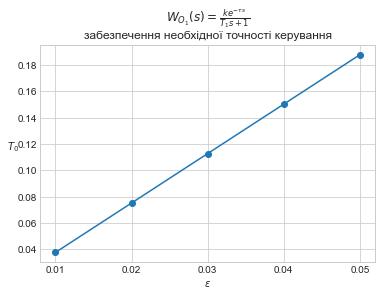

In [3]:
B_max = k / T_1
eps = [0.01, 0.02, 0.03, 0.04, 0.05]
for e in eps:
    print(f'eps = {e}, T_0 = {e/B_max:.4f}')

plt.plot(eps, [e/B_max for e in eps])
plt.scatter(eps, [e/B_max for e in eps])
plt.xticks(eps)
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_0$', rotation=0)
plt.title('$W_{O_1}(s) = \\frac{k e^{-\\tau s}}{T_1 s + 1}$\nзабезпечення необхідної точності керування')
plt.savefig(f'{IMAGES_DIR}/W_01_accur.png', dpi=300, bbox_inches='tight')
plt.show()

$$W_{O_2}(s) = \frac{k e^{-\tau s}}{(T_1 s + 1)(T_2 s + 1)}$$

Період квантування: $T_0 = \frac{\varepsilon}{B_{\max}}$, $B_{\max} = \frac{k}{T_1 + T_2}$

eps = 0.01, T_0 = 0.0579
eps = 0.02, T_0 = 0.1159
eps = 0.03, T_0 = 0.1738
eps = 0.04, T_0 = 0.2318
eps = 0.05, T_0 = 0.2897


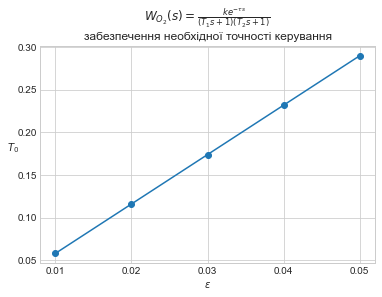

In [4]:
B_max = k / (T_1 + T_2)
eps = [0.01, 0.02, 0.03, 0.04, 0.05]
for e in eps:
    print(f'eps = {e}, T_0 = {e/B_max:.4f}')

plt.plot(eps, [e/B_max for e in eps])
plt.scatter(eps, [e/B_max for e in eps])
plt.xticks(eps)
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_0$', rotation=0)
plt.title('$W_{O_2}(s) = \\frac{k e^{-\\tau s}}{(T_1 s + 1)(T_2 s + 1)}$\nзабезпечення необхідної точності керування')
plt.savefig(f'{IMAGES_DIR}/W_02_accur.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.2. Розрахунок за критерієм Джурі

За цим критерієм період квантування обчислюється як $T_0 = \frac{\pi}{\omega_k}$, де 
$\omega_k$ - розв'язок рівняння
$$
    \left| W_{\text{з}}(j \omega_k) \right|
    = \left|
        \frac{W_O (j \omega_k) W_p (j \omega_k)}{
            1 + W_O (j \omega_k) W_p (j \omega_k)
        }
    \right| = \varepsilon
$$

### 3.2.1. Випадок $W_{O_1}(s) = \frac{k e^{-\tau s}}{T_1 s + 1}$

Згідно з розділом 4, оптимальним регулятором в цьому випадку є ПІ-регулятор з передаточною функцією 
$W_p(s) = K_p \left(1 + \frac{1}{T_I s}\right) = K_p \cdot \frac{T_1 s + 1}{T_1 s}$, де $K_p = \frac{\lambda T_1}{k \left(1 + \lambda \tau\right)}$, $\lambda = \frac{1}{T_1}$, $T_I = T_1$.
Знайдемо $\left| W_{\text{з}}(j\omega) \right|$:
$$
    \left| W_{\text{з}}(j\omega) \right| = \frac{
        \left| W_{O_1} (j \omega) W_p (j \omega) \right|
    }{
        \left| 1 + W_{O_1} (j \omega) W_p (j \omega) \right|
    } = 
    \frac{
        \left|\frac{k e^{-\tau j \omega}}{T_1 j \omega + 1} \cdot  K_p \cdot \frac{T_1 j \omega + 1}{T_1 j \omega} \right|
    }{
        \left|1 + \frac{k e^{-\tau j \omega}}{T_1 j \omega + 1} \cdot  K_p \cdot \frac{T_1 j \omega + 1}{T_1 j \omega} \right|
    } = \\ =
    \frac{
        \left|k K_p e^{-\tau j \omega} \right|
    }{
        \left|T_1 j \omega + k K_p  e^{-\tau j \omega} \right|
    } = \frac{
        1
    }{
        \left|1 + \frac{T_1}{k K_p} j \omega e^{\tau j \omega} \right|
    } = \frac{
        1
    }{
        \left|1 + \frac{T_1}{k K_p} j \omega \left(\cos \tau\omega + j \sin \tau\omega\right) \right|
    } = \\ =
    \frac{
        1
    }{
        \left| 1 + \frac{T_1}{k K_p}
        \left(j \omega \cos \tau\omega - \omega \sin \tau\omega\right) \right|
    } = \frac{
        1
    }{
        \left| 1 - \frac{T_1}{k K_p} \omega \sin \tau\omega + 
        j \frac{T_1}{k K_p} \omega \cos \tau\omega\right|
    } = \\ = \frac{
        1
    }{
        \sqrt{
            \left(1 - \frac{T_1}{k K_p} \omega \sin \tau\omega\right)^2 +
            \left(\frac{T_1}{k K_p} \omega \cos \tau\omega\right)^2
        }
    } = \frac{
        1
    }{
        \sqrt{
            \left(\frac{T_1}{k K_p}\right)^2 \omega^2 - 2\frac{T_1}{k K_p} \omega \sin \tau\omega + 1
        }
    }
$$
Отже, $\left| W_{\text{з}}(j\omega) \right| = \varepsilon \Leftrightarrow \left(\frac{T_1}{k K_p}\right)^2 \omega^2 - 2\frac{T_1}{k K_p} \omega \sin \tau\omega + 1 = \frac{1}{\varepsilon^2}$.

eps = 0.01, w_k = 2.0361, T_0 = 1.5430
eps = 0.02, w_k = 1.0391, T_0 = 3.0234
eps = 0.03, w_k = 0.6785, T_0 = 4.6304
eps = 0.04, w_k = 0.5285, T_0 = 5.9449
eps = 0.05, w_k = 0.3937, T_0 = 7.9803


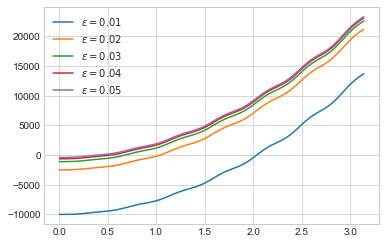

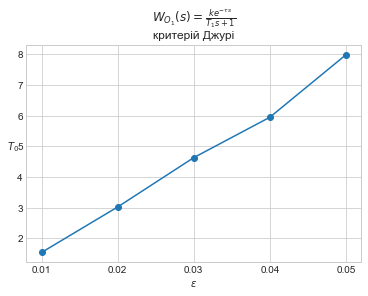

In [5]:
K_p = 1 / (k * (1 + tau/T_1))
eps = [0.01, 0.02, 0.03, 0.04, 0.05]
T_0_val = []
for e in eps:
    plt.plot(np.linspace(0, np.pi, 100), [(T_1 * w / (k * K_p))**2 - 2 * T_1 * w / (k * K_p) * np.sin(tau * w) + 1 - 1/e**2 for w in np.linspace(0, np.pi, 100)], label=f'$\\varepsilon = {e}$')
    w_k = fsolve(lambda w: (T_1 * w / (k * K_p))**2 - 2 * T_1 * w / (k * K_p) * np.sin(tau * w) + 1 - 1/e**2, x0=0.5)[0]
    T_0_val.append(np.pi / w_k)
    print(f'eps = {e}, w_k = {w_k:.4f}, T_0 = {np.pi / w_k:.4f}')
    if e == 0.01:
        T_0_Jury_3_2_1 = T_0_val[-1]
plt.legend()
plt.show()

plt.plot(eps, T_0_val)
plt.scatter(eps, T_0_val)
plt.xticks(eps)
plt.xlabel('$\\varepsilon$')
plt.ylabel('$T_0$', rotation=0)
plt.title('$W_{O_1}(s) = \\frac{k e^{-\\tau s}}{T_1 s + 1}$\nкритерій Джурі')
plt.savefig(f'{IMAGES_DIR}/W_01_Jury.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.2.2. Випадок $W_{O_2}(s) = \frac{k e^{-\tau s}}{(T_1 s + 1)(T_2 s + 1)}$

**!!! ПІСЛЯ РОЗДІЛУ 5**

Згідно з розділом 5, оптимальним регулятором в цьому випадку є ПІ-регулятор з передаточною функцією 
$W_p(s) = K_p \left(1 + \frac{1}{T_I s}\right) = K_p \cdot \frac{T_1 s + 1}{T_1 s}$, де $K_p$ та $T_I$ визначені резонансим методом.
Аналітичний запис $\left| W_{\text{з}}(j\omega) \right|$ досить складний, тому одразу наведемо чисельно знайдені розв'язки
рівняння $\left| W_{\text{з}}(j\omega) \right| = \varepsilon$ для різних $\varepsilon$

In [6]:
try:
    def W_zamk_mod(w):
        _W_obj = lambda s: k * np.exp(-tau * s) / ((T_1 * s + 1) * (T_2 * s + 1))
        _W_reg = lambda s: np.round(REGULATORS['резонансний']['2 порядок неперервний']['_K_p'], 5) * (1 + 1 / (np.round(REGULATORS['резонансний']['2 порядок неперервний']['_T_I'], 5) * s))
        _W_zamk = lambda s: _W_obj(s) * _W_reg(s) / (1 + _W_obj(s) * _W_reg(s))
        return np.abs(_W_zamk(1j * w))

    eps = [0.01, 0.02, 0.03, 0.04, 0.05]
    T_0_val = []
    for e in eps:
        plt.plot(np.linspace(0.1, np.pi, 100), [W_zamk_mod(w) - e for w in np.linspace(0.1, np.pi, 100)], label=f'$\\varepsilon = {e}$')
        w_k = fsolve(lambda w: W_zamk_mod(w) - e , x0=0.5)[0]
        T_0_val.append(np.pi / w_k)
        print(f'eps = {e}, w_k = {w_k:.4f}, T_0 = {np.pi / w_k:.4f}')
    plt.legend()
    plt.show()

    plt.plot(eps, T_0_val)
    plt.scatter(eps, T_0_val)
    plt.xticks(eps)
    plt.xlabel('$\\varepsilon$')
    plt.ylabel('$T_0$', rotation=0)
    plt.title('$W_{O_1}(s) = \\frac{k e^{-\\tau s}}{(T_1 s + 1)(T_2 s + 1)}$\nкритерій Джурі')
    plt.savefig(f'{IMAGES_DIR}/W_02_Jury.png', dpi=300, bbox_inches='tight')
    plt.show()

except NameError:
    print('Спочатку треба обчислити параметри регулятор резонансним методом (пункт 5.2)')

Спочатку треба обчислити параметри регулятор резонансним методом (пункт 5.2)


## 3.3. Розрахунок для об'єкта з динамікою в чисельнику

$$W_{O}(s) = \frac{k(T_1 s + 1)}{(T_2 s + 1)(T_3 s + 1)} = \frac{k(bT s + 1)}{T_1^2 s^2 + 2\nu T s + 1}$$

In [7]:
T = np.sqrt(T_2 * T_3)
b = T_1 / T
nu = (T_2 + T_3) / (2 * T)
theta = 31

Розв'яжемо рівняння $\left|W_O (j \omega_{\text{зр}})\right| = \frac{1}{\theta}$, де $\omega_{\text{зр}} = \frac{q}{T}$, $\theta = 31$. Еквівалентне: $q^4 + q^2 \left(4 \nu^2 - b^2 k^2 \theta^2 - 2\right) q^2 + \left(1 - k^2 \theta^2\right) = 0$.

In [8]:
print(4 * nu**2 - b**2 * k**2 * theta**2 - 2, 1 - k**2 * theta**2)
roots_squared = np.roots([1, 4 * nu**2 - b**2 * k**2 * theta**2 - 2, 1 - k**2 * theta**2])
print(f'{roots_squared[0]:.5f} {roots_squared[1]:.5f}')

-489263.66909090895 -83473.76640000001
489263.83970 -0.17061


Період квантування: $T_0 = \frac{\pi T}{q}$

In [9]:
q = np.sqrt(roots_squared.max())
print(f'q = {q:.4f}')
print(f'T_0 = {np.pi * T / q:.4f}')

q = 699.4740
T_0 = 0.0649


# Розділ 4. Визначення структури та оптимальних настройок регуляторів методом «прямого» синтезу

Згідно з методичними рекомендаціями, оптимальні параметри ПІ-регулятора з ДПФ 
$K_p \left(
    1 + \frac{T_0}{T_I \left(1 - z^{-1}\right)}
\right)$
визначаються за формулами
$$
    K_{p_{\text{опт}}} = \frac{
        1 - e^{-\lambda T_0}
    }{
        k \left(e^{T_0 / T_1} - 1\right) \left(1 + d \left(1 - e^{-\lambda T_0}\right)\right)
    } \\
    T_{I_{\text{опт}}} = \frac{T_0}{e^{T_0 / T_1} - 1}
$$
де $d$ - ціла частина від ділення часу запізнення $\tau$ на період квантування
$T_0$, який беремо на основі умови забезпечення необхідної точності керування.

In [10]:
REGULATORS = dict()
REGULATORS['прямий синтез'] = dict()

In [11]:
T_0 = 0.03 * T_1 / k
d = int(np.floor(tau / T_0))
def K_p_opt(l):
    return (1 - np.exp(-T_0 * l))/(k * (np.exp(T_0/T_1)-1) * (1 + d * (1 - np.exp(-T_0 * l))))

T_I_opt = T_0 / (np.exp(T_0 / T_1) - 1)

print(f'd = {d}')
print(f'T_I_opt = {T_I_opt:.4f}')

for multpl in [1, 1.5, 2, 3]:
    l = 1/(multpl * T_1)
    REGULATORS['прямий синтез'][f'lambda = 1/({multpl} T_1)'] = {
        '_T_0': np.round(T_0, 4),
        '_T_I': np.round(T_I_opt, 4), 
        '_K_p': np.round(K_p_opt(l), 4)
    }
    print(f'lambda = {l:.4f}, K_p_opt = {K_p_opt(l):.4f}')

d = 124
T_I_opt = 34.9437
lambda = 0.0286, K_p_opt = 0.0765
lambda = 0.0190, K_p_opt = 0.0564
lambda = 0.0143, K_p_opt = 0.0446
lambda = 0.0095, K_p_opt = 0.0315


Для вказаного набору параметрів настройки $\lambda$ шляхом цифрового моделювання побудувати перехідні процеси в замкненому контурі цифрового керування. Рекурентне рівняння, за яким буде відбуватися моделювання:
$$
    y_n = \left(1 + e^{-T_0/T_1}\right) y_{n-1} - e^{-T_0/T_1} y_{n-2} - \\ -
    \frac{k K_{p_{\text{опт}}}}{T_I} \left(
        \left(C_1 T_{I_{\text{опт}}} + C_1 T_0\right) y_{n-d-1} + 
        \left(-C_1 T_{I_{\text{опт}}} + C_2 T_{I_{\text{опт}}} + C_2 T_0\right) y_{n-d-2} -
        C_2 T_I y_{n-d-3}
    \right) + \\  + \frac{k K_{p_{\text{опт}}}}{T_I} \left(
        \left(C_1 T_{I_{\text{опт}}} + C_1 T_0\right) g_{n-d-1} + 
        \left(-C_1 T_{I_{\text{опт}}} + C_2 T_{I_{\text{опт}}} + C_2 T_0\right) g_{n-d-2} -
        C_2 T_I g_{n-d-3}
    \right)
$$
де $a = 1 - \frac{\tau - d T_0}{T_0}$, $C_1 = 1 - e^{-\frac{a T_0}{T_1}}$,
$C_2 = e^{-\frac{a T_0}{T_1}} - e^{-\frac{T_0}{T_1}}$, початкові умови для $y$ нульові,
а $g_n = 1$.

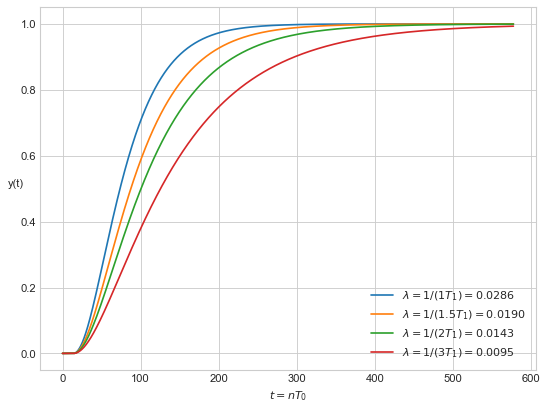

In [12]:
a = 1 - (tau - d*T_0)/T_0
C_1 = 1 - np.exp(-a * T_0 / T_1)
C_2 = np.exp(-a * T_0 / T_1) - np.exp(-T_0 / T_1)

modeling_steps = 5000

plt.figure(figsize=(8, 6), dpi=80)
for multpl in [1, 1.5, 2, 3]:
     l = 1/(multpl * T_1)
     K_p = K_p_opt(l)

     y_out = [0] * (d + 3)
     g_in = [1] * (d + 3)
     for n in range(d+3, d+3+modeling_steps):
          g_in.append(1)
          y_out.append(
               (1 + np.exp(-T_0/T_1)) * y_out[n-1] - np.exp(-T_0/T_1) * y_out[n-2] - k*K_p/T_I_opt * (
                    C_1 * (T_I_opt + T_0) * y_out[n-d-1] + (-C_1 * T_I_opt + C_2 * T_I_opt + C_2 * T_0) * y_out[n-d-2] -C_2 * T_I_opt * y_out[n-d-3]
               ) + k*K_p/T_I_opt * (
                    C_1 * (T_I_opt + T_0) * g_in[n-d-1] + (-C_1 * T_I_opt + C_2 * T_I_opt + C_2 * T_0) * g_in[n-d-2] -C_2 * T_I_opt * g_in[n-d-3]
               )
           )
     plt.plot(np.arange(len(y_out))*T_0, y_out, label=f'$\lambda = 1/({multpl} T_1) ={l:.4f}$')


plt.xlabel('$t = nT_0$')
plt.ylabel('y(t)', rotation=0)
plt.legend()
plt.savefig(f'{IMAGES_DIR}/transient_process_task_4.png', bbox_inches='tight', dpi=300)
plt.show()

# Розділ 5. Розрахунок оптимальних параметрів ПІ-регулятора і періоду квантування резонансним методом

## 5.1. Випадок $W_O(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1) (T_3 s + 1)}$

а) Шляхом розв'язання відносно частоти $\omega$ нелінійного рівняння
$$
        \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \mathrm{arctg}\;{\omega T_3} + \omega \tau = 2.62
$$
знаходимо резонансну частоту $\omega_{\varphi_H}$ для неперервного контура керування.

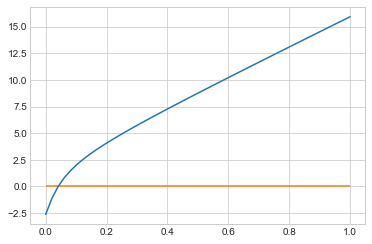

In [13]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [14]:
w_phi_H = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau - 2.62, x0=0.0)[0]
print(f'w_phi_H = {w_phi_H:.5f}')

w_phi_H = 0.04096


б) Визначаємо верхню та нижню частоту відносно резонансної частоти неперервної системи:
$\omega_{\varphi_H}^H = \frac{\omega_{\varphi_H}}{\sqrt{2}}$, $\omega_{\varphi_H}^B = {\sqrt{2}}{\omega_{\varphi_H}}$

In [15]:
w_phi_H_H = w_phi_H / np.sqrt(2)
w_phi_H_B = w_phi_H * np.sqrt(2)
print(f'w_phi_H_H = {w_phi_H_H:.5f}')
print(f'w_phi_H_B = {w_phi_H_B:.5f}')

w_phi_H_H = 0.02897
w_phi_H_B = 0.05793


в) Використовуючи знайдену частоту $\omega_{\varphi_H}$, за формулою
$$
        A(\omega) = \frac{k}{\sqrt{\left(1+\omega^2 T_1^2\right)\left(1+\omega^2 T_2^2\right)\left(1+\omega^2 T_3^2\right)}}
$$
знаходимо другий основний динамічний параметр неперервного контура в частотній області 
$A_H\left(\omega_{\varphi_H}\right)$. Також, знайдемо третій основний параметр
$\Phi_H(A) = \frac{A(\omega_{\varphi_H}^B)}{A(\omega_{\varphi_H}^H)}$.

In [16]:
A_w_H = lambda w: k/np.sqrt(
    (1 + w**2 * T_1**2) * (1 + w**2 * T_2**2) * (1 + w**2 * T_3**2)
)
A_H_w_phi_H = A_w_H(w_phi_H)
Phi_H_A = A_w_H(w_phi_H_B) / A_w_H(w_phi_H_H)
print(f'A_H_w_phi_H = {A_H_w_phi_H:.5f}')
print(f'Phi_H_A = {Phi_H_A:.5f}')

A_H_w_phi_H = 3.83604
Phi_H_A = 0.42790


г) Використовуючи вираз 
$$
    \varphi(\omega) = \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \mathrm{arctg}\;{\omega T_3} + \omega \tau
$$
визначаємо четвертий основний параметр в частотній області для неперервного контуру:
$\Phi_H(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.


In [17]:
phi_w_H = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau
Phi_H_phi = phi_w_H(w_phi_H_B) - phi_w_H(w_phi_H_H)
print(f'Phi_H_phi = {Phi_H_phi:.5f}')

Phi_H_phi = 1.31497


д) За емпіричними формулами визначаємо оптимальні коефіцієнти настройки неперервного ПІ-регулятора
та оптимальний період квантування:
$$
    T_{I_{\text{опт}}}^{\text{неп}} = 
    \frac{4.061 \cdot \Phi_H(A)^{-0.3387} \cdot \Phi_H(\varphi)^{0.2075}}{\omega_{\varphi_H}} \\
    K_{p_{\text{опт}}}^{\text{неп}} = \frac{1}{2 A_H\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi_H(A)^{0.7139}\cdot \left(1.852 - \Phi_H(\varphi)\right)^{0.8643}
    \right) \\
    T_{0_{\text{опт}}} = \frac{
        0.5742 \cdot \Phi_H(A)^{0.5742} \Phi_H(\varphi)^{0.9394}
    }{\omega_{\varphi_H}}
$$

In [18]:
T_I_opt_HEP = (
    4.061 * Phi_H_A ** (-0.3387) * Phi_H_phi ** (0.2075)
) / w_phi_H
K_p_opt_HEP = (
    1 + 1.189 * Phi_H_A ** (0.7139) * (1.852 - Phi_H_phi) ** 0.8643
) / (2 * A_H_w_phi_H)
T_0_opt = (
    0.5742 * Phi_H_A ** (0.5742) * Phi_H_phi ** (0.9394)
) / w_phi_H
print(f'T_I_opt_HEP = {T_I_opt_HEP:.5f}')
print(f'K_p_opt_HEP = {K_p_opt_HEP:.5f}')
print(f'T_0_opt = {T_0_opt:.5f}')

REGULATORS['резонансний'] = dict()
REGULATORS['резонансний']['3 порядок'] = dict()
REGULATORS['резонансний']['3 порядок']['_T_0'] = T_0_opt

T_I_opt_HEP = 139.88408
K_p_opt_HEP = 0.17974
T_0_opt = 11.13496


е) При оптимальному періоду квантування визначаємо чотири основні параметри 
$\omega_{\varphi}$, $A\left(\omega_{\varphi}\right)$, $\Phi(A)$, $\Phi(\varphi)$
в частотній області при врахуванні ПНЧ об'єкта. Для цього використаємо рівняння
$$
    A(\omega) = A_H(\omega) \cdot \frac{
        \sin {\frac{\omega T_{0_{\text{опт}}}}{2}}
    }{
        {\frac{\omega T_{0_{\text{опт}}}}{2}}
    } \\
    \varphi(\omega) = 
    \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \mathrm{arctg}\;{\omega T_3} + \omega \tau + {\frac{\omega T_{0_{\text{опт}}}}{2}} 
$$
Шляхом розв'язання $\varphi(\omega) = 2.62$ знаходимо частоту 
$\omega_{\varphi}$, а потім за рівняннями знаходимо 
$A\left(\omega_{\varphi}\right)$, 
$\Phi(A) = \frac{A\left((\omega_{\varphi_H}^B\right)}{A\left(\omega_{\varphi_H}^H\right)}$, 
$\Phi(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.

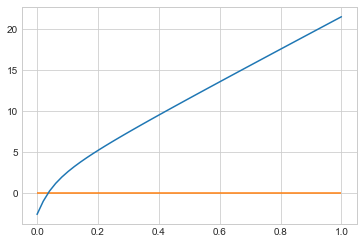

In [19]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau + w * T_0_opt/2 - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [20]:
w_phi = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau + w * T_0_opt/2 - 2.62, x0=0.0)[0]
print(f'w_phi = {w_phi:.5f}')

A_w = lambda w: A_w_H(w) * np.sin(w * T_0_opt / 2) / (w * T_0_opt / 2)

A_w_phi = A_w(w_phi)
print(f'A_w_phi = {A_w_phi:.5f}')

Phi_A = A_w(w_phi * np.sqrt(2)) / A_w(w_phi / np.sqrt(2))
print(f'Phi_A = {Phi_A:.5f}')

phi_w = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + np.arctan(w*T_3) + w*tau + w * T_0_opt/2
Phi_phi = phi_w(w_phi * np.sqrt(2)) - phi_w(w_phi / np.sqrt(2))
print(f'Phi_phi = {Phi_phi:.5f}')

w_phi = 0.03670
A_w_phi = 4.32464
Phi_A = 0.46223
Phi_phi = 1.39902


ж) При оптимальному періоді квантування $T_{0_{\text{опт}}}$ знаходимо 
оптимальні значення $T_{I_{\text{опт}}}$ та $K_{p_{\text{опт}}}$ за формулами
$$
    T_{I_{\text{опт}}} = 
    \frac{4.061 \cdot \Phi(A)^{-0.3387} \cdot \Phi(\varphi)^{0.2075}}{\omega_{\varphi}} \\
    K_{p_{\text{опт}}} = \frac{1}{2 A\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi(A)^{0.7139}\cdot \left(1.852 - \Phi(\varphi)\right)^{0.8843}
    \right)
$$

In [21]:
T_I_opt = (
    4.061 * Phi_A ** (-0.3387) * Phi_phi ** (0.2075)
) / w_phi
K_p_opt = (
    1 + 1.189 * Phi_A ** (0.7139) * (1.852 - Phi_phi)  ** (0.8843)
) / (2 * A_w_phi)
print(f'T_I_opt = {T_I_opt:.5f}')
print(f'K_p_opt = {K_p_opt:.5f}')

REGULATORS['резонансний']['3 порядок']['_T_I'] = T_I_opt
REGULATORS['резонансний']['3 порядок']['_K_p'] = K_p_opt

T_I_opt = 154.07932
K_p_opt = 0.15495


Для цифрового моделювання перехідного процесу вихідної координати $y$ скористаємося передаточною функцією $W_\text{з}(s)$:
$$
    y(s) = W_\text{з}(s) G(s) = \frac{W_p(s) W_O(s)}{1 + W_p(s) W_O(s)} G(s) \\
    W_p(s) = K_{p_{\text{опт}}} \left(1 + \frac{1}{T_{I_{\text{опт}}} s}\right), \;
    G(s) = \frac{1}{s} \left(1 - e^{-s T_{0_{\text{опт}}}}\right)
$$

Чисельно знайшовши обернене перетворення Лапласа від $y(s)$ в моменти $n T_{0_{\text{опт}}}$, 
отримаємо значення вихідної координати при подачі на задаюче діяння одиничного імпульсу довжиною $T_{0_{\text{опт}}}$.

100%|██████████| 89/89 [00:03<00:00, 27.98it/s]


A = 0.29424, B = 0.04990
B / A = 0.16958


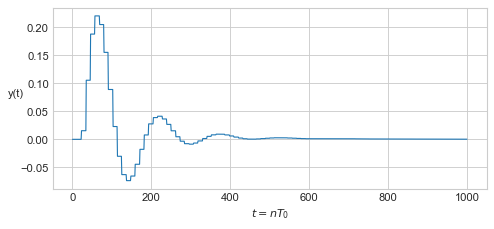

In [22]:
W_obj = lambda s: k * mp.exp(- tau * s) / ((T_1 * s + 1) * (T_2 * s + 1) * (T_3 * s + 1))
W_reg = lambda s: REGULATORS['резонансний']['3 порядок']['_K_p'] * (1 + 1 / (REGULATORS['резонансний']['3 порядок']['_T_I'] * s))
G = lambda s: (1 - mp.exp(- s * REGULATORS['резонансний']['3 порядок']['_T_0'])) / s

W_zamk = lambda s: (W_obj(s) * W_reg(s) / (1 + W_obj(s) * W_reg(s))) * G(s)

y_out = lambda t: mp.invertlaplace(W_zamk, t, method='dehoog') if t > 0 else 0

max_modeling_time = 1000
t_discr = np.linspace(0, max_modeling_time, num=int(max_modeling_time/REGULATORS['резонансний']['3 порядок']['_T_0']))
y_val = np.array([float(y_out(t)) for t in tqdm(t_discr)])

A = y_val.max() - y_val.min()
B = y_val[y_val.argmin():].max() - y_val[y_val.argmin():][y_val[y_val.argmin():].argmax():].min()
print(f'A = {A:.5f}, B = {B:.5f}')
print(f'B / A = {(B / A):.5f}')

interp = interp1d(t_discr, y_val, kind='zero')
t_domain = np.linspace(0, max_modeling_time, num=max_modeling_time)

plt.figure(figsize=(7, 3), dpi=80)
plt.plot(t_domain, interp(t_domain), linewidth=1)
plt.xlabel('$t = nT_0$')
plt.ylabel('y(t)', rotation=0)
plt.savefig(f'{IMAGES_DIR}/transient_process_task_5_1.png', bbox_inches='tight', dpi=300)
plt.show()

## 5.2. Випадок $W_{O_2}(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1)}$

а) Шляхом розв'язання відносно частоти $\omega$ нелінійного рівняння
$$
        \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \omega \tau = 2.62
$$
знаходимо резонансну частоту $\omega_{\varphi_H}$ для неперервного контура керування.

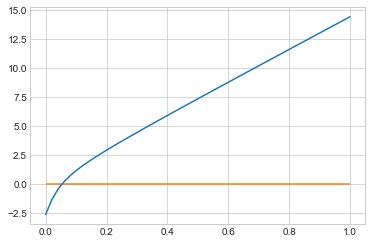

In [23]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [24]:
w_phi_H = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau - 2.62, x0=0.0)[0]
print(f'w_phi_H = {w_phi_H:.5f}')

w_phi_H = 0.05341


б) Визначаємо верхню та нижню частоту відносно резонансної частоти неперервної системи:
$\omega_{\varphi_H}^H = \frac{\omega_{\varphi_H}}{\sqrt{2}}$, $\omega_{\varphi_H}^B = {\sqrt{2}}{\omega_{\varphi_H}}$

In [25]:
w_phi_H_H = w_phi_H / np.sqrt(2)
w_phi_H_B = w_phi_H * np.sqrt(2)

print(f'w_phi_H_H = {w_phi_H_H:.5f}')
print(f'w_phi_H_B = {w_phi_H_B:.5f}')

w_phi_H_H = 0.03777
w_phi_H_B = 0.07553


в) Використовуючи знайдену частоту $\omega_{\varphi_H}$, за формулою
$$
        A(\omega) = \frac{k}{\sqrt{\left(1+\omega^2 T_1^2\right)\left(1+\omega^2 T_2^2\right)}}
$$
знаходимо другий основний динамічний параметр неперервного контура в частотній області 
$A_H\left(\omega_{\varphi_H}\right)$. Також, знайдемо третій основний параметр
$\Phi_H(A) = \frac{A(\omega_{\varphi_H}^B)}{A(\omega_{\varphi_H}^H)}$.

In [26]:
A_w_H = lambda w: k/np.sqrt(
    (1 + w**2 * T_1**2) * (1 + w**2 * T_2**2)
)
A_H_w_phi_H = A_w_H(w_phi_H)
Phi_H_A = A_w_H(w_phi_H_B) / A_w_H(w_phi_H_H)
print(f'A_H_w_phi_H = {A_H_w_phi_H:.5f}')
print(f'Phi_H_A = {Phi_H_A:.5f}')

A_H_w_phi_H = 3.08583
Phi_H_A = 0.41264


г) Використовуючи вираз 
$$
    \varphi(\omega) = \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \omega \tau
$$
визначаємо четвертий основний параметр в частотній області для неперервного контуру:
$\Phi_H(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.

In [27]:
phi_w_H = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau
Phi_H_phi = phi_w_H(w_phi_H_B) - phi_w_H(w_phi_H_H)
print(f'Phi_H_phi = {Phi_H_phi:.5f}')

Phi_H_phi = 1.15456


д) За емпіричними формулами визначаємо оптимальні коефіцієнти настройки неперервного ПІ-регулятора
та оптимальний період квантування:
$$
    T_{I_{\text{опт}}}^{\text{неп}} = 
    \frac{4.061 \cdot \Phi_H(A)^{-0.3387} \cdot \Phi_H(\varphi)^{0.2075}}{\omega_{\varphi_H}} \\
    K_{p_{\text{опт}}}^{\text{неп}} = \frac{1}{2 A_H\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi_H(A)^{0.7139}\cdot \left(1.852 - \Phi_H(\varphi)\right)^{0.8643}
    \right) \\
    T_{0_{\text{опт}}} = \frac{
        0.5742 \cdot \Phi_H(A)^{0.5742} \Phi_H(\varphi)^{0.9394}
    }{\omega_{\varphi_H}}
$$

In [28]:
T_I_opt_HEP = (
    4.061 * Phi_H_A ** (-0.3387) * Phi_H_phi ** (0.2075)
) / w_phi_H
K_p_opt_HEP = (
    1 + 1.189 * Phi_H_A ** (0.7139) * (1.852 - Phi_H_phi) ** (0.8643)
) / (2 * A_H_w_phi_H)
T_0_opt = (
    0.5742 * Phi_H_A ** (0.5742) * Phi_H_phi ** (0.9394)
) / w_phi_H
print(f'T_I_opt_HEP = {T_I_opt_HEP:.5f}')
print(f'K_p_opt_HEP = {K_p_opt_HEP:.5f}')
print(f'T_0_opt = {T_0_opt:.5f}')

REGULATORS['резонансний']['2 порядок'] = dict()
REGULATORS['резонансний']['2 порядок']['_T_0'] = T_0_opt
REGULATORS['резонансний']['2 порядок неперервний'] = dict()
REGULATORS['резонансний']['2 порядок неперервний']['_T_I'] = T_I_opt_HEP
REGULATORS['резонансний']['2 порядок неперервний']['_K_p'] = K_p_opt_HEP

T_I_opt_HEP = 105.72649
K_p_opt_HEP = 0.23703
T_0_opt = 7.40205


е) При оптимальному періоду квантування визначаємо чотири основні параметри 
$\omega_{\varphi}$, $A\left(\omega_{\varphi}\right)$, $\Phi(A)$, $\Phi(\varphi)$
в частотній області при врахуванні ПНЧ об'єкта. Для цього використаємо рівняння
$$
    A(\omega) = A_H(\omega) \cdot \frac{
        \sin {\frac{\omega T_{0_{\text{опт}}}}{2}}
    }{
        {\frac{\omega T_{0_{\text{опт}}}}{2}}
    } \\
    \varphi(\omega) = 
    \mathrm{arctg}\;{\omega T_1} + \mathrm{arctg}\;{\omega T_2} + \omega \tau + {\frac{\omega T_{0_{\text{опт}}}}{2}} 
$$
Шляхом розв'язання $\varphi(\omega) = 2.62$ знаходимо частоту 
$\omega_{\varphi}$, а потім за рівняннями знаходимо 
$A\left(\omega_{\varphi}\right)$, 
$\Phi(A) = \frac{A\left((\omega_{\varphi_H}^B\right)}{A\left(\omega_{\varphi_H}^H\right)}$, 
$\Phi(\varphi) = \varphi\left(\omega_{\varphi_H}^H\right) - \varphi\left(\omega_{\varphi_H}^B\right)$.

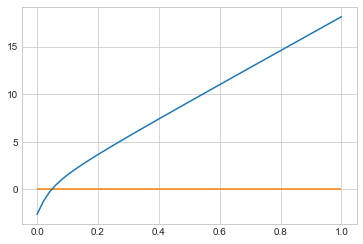

In [29]:
# для початкового наближення кореня
plt.plot(np.linspace(0, 1), [np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau + w * T_0_opt/2 - 2.62 for w in np.linspace(0, 1)])
plt.hlines(0, 0, 1, color='tab:orange')
plt.show()

In [30]:
w_phi = fsolve(lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau + w * T_0_opt/2 - 2.62, x0=0.0)[0]
print(f'w_phi = {w_phi:.5f}')

A_w = lambda w: A_w_H(w) * np.sin(w * T_0_opt / 2) / (w * T_0_opt / 2)

A_w_phi = A_w(w_phi)
print(f'A_w_phi = {A_w_phi:.5f}')

Phi_A = A_w(w_phi * np.sqrt(2)) / A_w(w_phi / np.sqrt(2))
print(f'Phi_A = {Phi_A:.5f}')

phi_w = lambda w: np.arctan(w*T_1) + np.arctan(w*T_2) + w*tau + w * T_0_opt/2
Phi_phi = phi_w(w_phi * np.sqrt(2)) - phi_w(w_phi / np.sqrt(2))
print(f'Phi_phi = {Phi_phi:.5f}')

w_phi = 0.04792
A_w_phi = 3.51065
Phi_A = 0.43618
Phi_phi = 1.23981


ж) При оптимальному періоді квантування $T_{0_{\text{опт}}}$ знаходимо 
оптимальні значення $T_{I_{\text{опт}}}$ та $K_{p_{\text{опт}}}$ за формулами
$$
    T_{I_{\text{опт}}} = 
    \frac{4.061 \cdot \Phi(A)^{-0.3387} \cdot \Phi(\varphi)^{0.2075}}{\omega_{\varphi}} \\
    K_{p_{\text{опт}}} = \frac{1}{2 A\left(\omega_{\varphi_H}\right)}
    \cdot \left(
        1 + 1.189 \cdot \Phi(A)^{0.7139}\cdot \left(1.852 - \Phi(\varphi)\right)^{0.8843}
    \right)
$$

In [31]:
T_I_opt = (
    4.061 * Phi_A ** (-0.3387) * Phi_phi ** (0.2075)
) / w_phi
K_p_opt = (
    1 + 1.189 * Phi_A ** (0.7139) * (1.852 - Phi_phi) ** (0.8843)
) / (2 * A_w_phi)
print(f'T_I_opt = {T_I_opt:.5f}')
print(f'K_p_opt = {K_p_opt:.5f}')


REGULATORS['резонансний']['2 порядок']['_T_I'] = T_I_opt
REGULATORS['резонансний']['2 порядок']['_K_p'] = K_p_opt

T_I_opt = 117.36092
K_p_opt = 0.20311


Цифрове моделювання перехідного процесу вихідної координати $y$ проведемо аналогічно попередньому пункту.

100%|██████████| 135/135 [00:04<00:00, 29.06it/s]


A = 0.28438, B = 0.04621
B / A = 0.16249


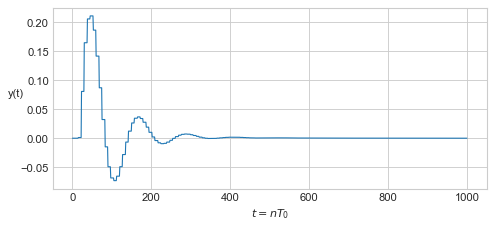

In [32]:
W_obj = lambda s: k * mp.exp(- tau * s) / ((T_1 * s + 1) * (T_2 * s + 1))
W_reg = lambda s: REGULATORS['резонансний']['2 порядок']['_K_p'] * (1 + 1 / (REGULATORS['резонансний']['2 порядок']['_T_I'] * s))
G = lambda s: (1 - mp.exp(- s * REGULATORS['резонансний']['2 порядок']['_T_0'])) / s

W_zamk = lambda s: (W_obj(s) * W_reg(s) / (1 + W_obj(s) * W_reg(s))) * G(s)

y_out = lambda t: mp.invertlaplace(W_zamk, t, method='dehoog') if t > 0 else 0

max_modeling_time = 1000
t_discr = np.linspace(0, max_modeling_time, num=int(max_modeling_time/REGULATORS['резонансний']['2 порядок']['_T_0']))
y_val = np.array([float(y_out(t)) for t in tqdm(t_discr)])

A = y_val.max() - y_val.min()
B = y_val[y_val.argmin():].max() - y_val[y_val.argmin():][y_val[y_val.argmin():].argmax():].min()
print(f'A = {A:.5f}, B = {B:.5f}')
print(f'B / A = {(B / A):.5f}')

interp = interp1d(t_discr, y_val, kind='zero')
t_domain = np.linspace(0, max_modeling_time, num=max_modeling_time)

plt.figure(figsize=(7, 3), dpi=80)
plt.plot(t_domain, interp(t_domain), linewidth=1)
plt.xlabel('$t = nT_0$')
plt.ylabel('y(t)', rotation=0)
plt.savefig(f'{IMAGES_DIR}/transient_process_task_5_2.png', bbox_inches='tight', dpi=300)
plt.show()

# Розділ 6. Синтез лінійно-квадратичного регулятора стану

Розглянемо математичну модель об'єкта у вигляді передаточної функції
$$
    W_O(s) = \frac{y(s)}{u(s)} = \frac{
    k
    }{
        (T_1 s + 1) (T_2 s + 1) (T_3 s + 1)
    } = \\ = \frac{
        k
    }{
        T_1 T_2 T_3 s^3 + \left(T_1 T_2 + T_1 T_3 + T_2 T_3\right) s^2
        + \left(T_1 + T_2 + T_3\right) s + 1
    }
$$
Введемо нові коефіцієнти 
$$
    a_1 = \frac{T_1 T_2 + T_1 T_3 + T_2 T_3}{T_1 T_2 T_3}, a_2 = \frac{T_1 + T_2 + T_3}{T_1 T_2 T_3} \\
    a_3 = \frac{1}{T_1 T_2 T_3}, b = \frac{k}{T_1 T_2 T_3}
$$
після чого цю передаточну функцію можна записати наступним чином:
$$
    W_O(s) = \frac{b}{s^3 + a_1 s^2 + a_2 s + a_3} = \frac{y(s)}{u(s)}
$$

In [33]:
a_1 = (T_1 * T_2 + T_1 * T_3 + T_2 * T_3) / (T_1 * T_2 * T_3)
a_2 = (T_1 + T_2 + T_3) / (T_1 * T_2 * T_3)
a_3 = 1 / (T_1 * T_2 * T_3)
b = k / (T_1 * T_2 * T_3)
print(f'a_1 = {a_1:.5f}')
print(f'a_2 = {a_2:.5f}')
print(f'a_3 = {a_3:.5f}')
print(f'b = {b:.5f}')

a_1 = 0.17211
a_2 = 0.00889
a_3 = 0.00014
b = 0.00127


Введемо нову змінну $X(s) = \frac{u(s)}{s^3 + a_1 s^2 + a_2 s + a_3} = \frac{y(s)}{b}$, звідки
$$
    u(s) = \left(s^3 + a_1 s^2 + a_2 s + a_3\right) X(s)
$$
Виконавши зворотнє перетворення Лапласа, отримаємо
$$
    \frac{d^3 x(t)}{dt^3} = u(t) - a_1 \frac{d^2 x(t)}{dt^2} - a_2 \frac{d x(t)}{dt} - a_3 x(t)
$$
Введемо фазові змінні $x_1(t) = x(t)$, $x_2(t) = \frac{d x(t)}{dt}$, $x_3(t) = \frac{d^2 x(t)}{dt^2}$,
причому $\frac{d x_1(t)}{dt} = x_2(t)$, $\frac{d x_2(t)}{dt} = x_3(t)$,
$\frac{d x_3(t)}{dt} = -a_3 x_1(t) - a_2 x_2(t) - a_1 x_3(t) + u(t)$. Запишемо ці рівності у векторно-матричній формі:
$$
    \begin{bmatrix}
        \frac{d x_1(t)}{dt} \\ \frac{d x_2(t)}{dt} \\ \frac{d x_3(t)}{dt}
    \end{bmatrix} = 
    \begin{bmatrix}
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        -a_3 & -a_2 & -a_1
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\ x_2 \\ x_3
    \end{bmatrix} + 
    \begin{bmatrix}
        0 \\ 0 \\ 1
    \end{bmatrix} u(t)
    \Leftrightarrow
    \frac{d \vec{x}(t)}{dt} = A \vec{x}(t) + \vec{b} u(t)
$$
Виконаємо дискретизацію рівняння, використавши період квантування,
який було визначено в резонансному методі (`T_0_opt`, пункт 5.1):
$$
    \vec{x}\left[\left(k+1\right)T_0\right] = F \vec{x}\left[kT_0\right] + \vec{g} u\left[k T_0\right]
$$
де $F = e^{A T_0}$, $\vec{g} = \int_0^{T_0} e^{A t} \vec{b} dt = A^{-1} \left(e^{A T_0} - I\right) \vec{b}$.

In [34]:
T_0 = REGULATORS['резонансний']['3 порядок']['_T_0']
A = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [-a_3, -a_2, -a_1]
])
F = expm(T_0 * A)
g = np.linalg.inv(A) @ (F - np.eye(3)) @ np.array([[0, 0, 1]]).T

print(F)
print(g)

[[ 0.98025  9.79084 33.05949]
 [-0.00452  0.68649  4.1009 ]
 [-0.00056 -0.04096 -0.01933]]
[[144.46785]
 [ 33.05949]
 [  4.1009 ]]


Синтез лінійно-квадратичного регулятора стану 
$$
    u\left(k T_0\right) = -\vec{K}_p \vec{x}\left(k T_0\right) = 
    - \begin{bmatrix}
        K_1 & K_2 & K_3
    \end{bmatrix}
    \begin{bmatrix}
        x_1\left(k T_0\right) \\
        x_2\left(k T_0\right) \\
        x_3\left(k T_0\right)
    \end{bmatrix}
$$
виконаємо за рекурентною процедурою
$$
    \vec{K}_p (k) = \left(q_3 + \vec{g}^T L\left([k+1]T_0\right) \vec{g}\right)^{-1}
    \vec{g}^T L\left((k+1)T_0\right) F \\
    L\left(k T_0\right) = F^T L\left([k+1]T_0\right) F + Q_2 - 
    F^T L\left([k+1]T_0\right) \vec{g} \cdot \vec{K}_p (k)
$$
при початковому значенні матриці $L\left(n T_0\right) = Q_1$, де вагові матриці
$Q_1$, $Q_2$ та коефіцієнт $q_3$ обираються для забезпечення швидкості мінімізації квадратичного критерію оптимальності
$$
    I = \vec{x}^T \left(nT_0\right) Q_1 \vec{x} \left(nT_0\right) + 
    \sum_{k=0}^{n-1} \left(
        \vec{x}^T \left(k T_0\right) Q_2 \vec{x} \left(k T_0\right) + q_3 u^2 \left(k T_0\right)
    \right)
$$

In [35]:
L = np.eye(3)
Q_1 = np.eye(3)
Q_2 = np.eye(3)
q_3 = 1
for i in range(10):
    K_p_vect = 1/(q_3 + g.T @ L @ g) * (g.T @ L @ F)
    L = F.T @ L @ F + Q_2 - F.T @ L @ g @ K_p_vect
    
print(f'K_p = {K_p_vect}')

K_p = [[0.00278 0.03643 0.15089]]


In [36]:
def LinQuadModelPlot(n, x0):
    res = [np.linalg.matrix_power((F - g @ K_p_vect), k) @ x0 for k in range(n+1)]
    res = np.array(res).T
    for i in range(3):
        plt.plot(res[i], label=f'$x_{i+1}$', linewidth=1)
        plt.scatter(np.arange(modeling_steps+1), res[i])
    plt.xticks(np.arange(modeling_steps+1))
    plt.title(f'$x(0) = {x0}$')
    plt.legend()
    plt.savefig(f'{IMAGES_DIR}/lin_quad_model_{x0}.png', bbox_inches='tight', dpi=300)
    plt.show()

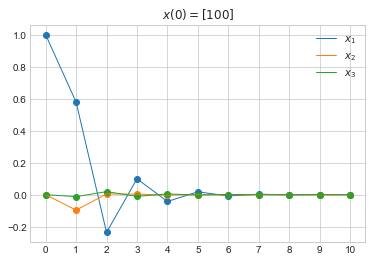

In [37]:
x0 = np.array([1, 0, 0])

modeling_steps = 10
LinQuadModelPlot(modeling_steps, x0)

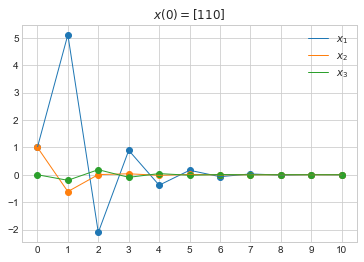

In [38]:
x0 = np.array([1, 1, 0])

modeling_steps = 10
LinQuadModelPlot(modeling_steps, x0)

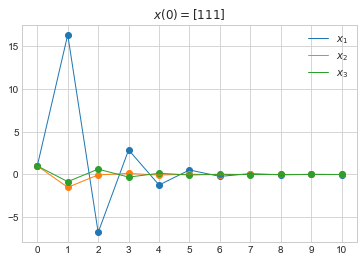

In [39]:
x0 = np.array([1, 1, 1])

modeling_steps = 10
LinQuadModelPlot(modeling_steps, x0)

# Розділ 7. Дослідження стійкості

## 7.1. Критерій Гурвіца

Дослідимо стійкість контура цифрового керування
з передаточною функцією об'єкта $W_O(s) = \frac{k e^{-\tau s}}{T_1 s + 1}$
та ПІ-регулятором, що має дискретну передаточну функцію
$W_p(z) = K_p \left(1 + \frac{T_0}{T_I \left(1 - z^{-1}\right)}\right)$.
Взявши період квантування $T_0 = 1.5430$, отриманий методом Джурі
у пункті 3.2.1, за 
формулами
$$
    K_{p_{\text{опт}}} = \frac{
        1 - e^{-\lambda T_0}
    }{
        k \left(e^{T_0 / T_1} - 1\right) \left(1 + d \left(1 - e^{-\lambda T_0}\right)\right)
    } \\
    T_{I_{\text{опт}}} = \frac{T_0}{e^{T_0 / T_1} - 1}
$$
де $d$ - ціла частина від ділення часу запізнення $\tau$ на період квантування $T_0$, $\lambda = \frac{1}{T_1}$,
визначимо оптимальні настройки ПІ-регулятора.

In [40]:
T_0 = np.round(T_0_Jury_3_2_1, 4)
d = int(np.floor(tau / T_0))
def K_p_opt(l):
    return (1 - np.exp(-T_0 * l))/(k * (np.exp(T_0/T_1)-1) * (1 + d * (1 - np.exp(-T_0 * l))));

T_I_opt = T_0 / (np.exp(T_0 / T_1) - 1)

print(f'd = {d}')
print(f'T_I_opt = {T_I_opt:.4f}')
print(f'K_p_opt = {K_p_opt(1/T_1):.4f}')    

d = 9
T_I_opt = 34.2342
K_p_opt = 0.0740


Розрахунок стійкості замкненої системи цифрового керування 
проведемо за послідовністю, наведеною у методичних рекомендаціях.

а) $d$ - ціле число від ділення часу запізнення на період квантування $T_0$, воно дорівнює 9.

б) За формулою 
$$
W_{\text{п}}(z) = 
    \frac{
        k \left(C_1 + C_2 z^{-1}\right) z^{-d-1}
    }{
        1 - e^{-T_0 / T_1} z^{-1}
    }
$$
де $d$ - ціла частина від ділення часу запізнення $\tau$ на період квантування
$T_0$, $a = 1 - \frac{\tau - d T_0}{T_0}$, $C_1 = 1 - e^{-\frac{a T_0}{T_1}}$,
$C_2 = e^{-\frac{a T_0}{T_1}} - e^{-\frac{T_0}{T_1}}$, обчислимо дискретну передаточну функцію приведеної неперервної частини.

In [41]:
a = 1 - (tau - d*T_0)/T_0
C_1 = 1 - np.exp(-a * T_0 / T_1)
C_2 = np.exp(-a * T_0 / T_1) - np.exp(-T_0 / T_1)
print(f'k * C_1 = {(k * C_1):.5f}')
print(f'k * C_2 = {(k * C_2):.5f}')
print(f'T_0 / T_1 = {(T_0 / T_1):.5f}')

k * C_1 = 0.37311
k * C_2 = 0.02884
T_0 / T_1 = 0.04409


в) Визначимо характеристичне рівняння замкненого контуру з рівності $1 + W_p(z)W_\text{п}(z) = 0$

In [42]:
symbols = dict(zip(['z', 'T_0', 'T_1', 'k', 'tau', 'K_p', 'T_I', 'd', 'w'], sp.symbols('z, T_0, T_1, k, \\tau, K_p, T_I, d, w')))

W_cont = (1 - symbols['z']**(-1)) * symbols['k'] * symbols['z'] ** (-symbols['d']-1) * (
    1 / (1 - symbols['z']**(-1)) - sp.exp(symbols['tau']/symbols['T_1'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_1']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_1']) * symbols['z']**(-1))
)
W_reg = symbols['K_p'] * (1 + symbols['T_0'] / (symbols['T_1'] * (1 - symbols['z']**(-1))))

char_pol = 1 + W_cont * W_reg

subs = {
    symbols['T_0']: T_0,
    symbols['T_1']: T_1,
    symbols['k']: k,
    symbols['tau']: tau,
    symbols['K_p']: K_p_opt(1/T_1),
    symbols['T_I']: T_I_opt,
    symbols['d']: int(np.floor(tau / T_0))
}

char_pol = sp.simplify(char_pol.subs(subs))
char_pol = sp.Poly(sp.fraction(char_pol)[0])
display(char_pol)

char_pol_coefs = {
    p: 
        char_pol.coeff_monomial(symbols['z']**p)
        for p in range(char_pol.degree()+1)
        if char_pol.coeff_monomial(symbols['z']**p) != 0
}

for degree in char_pol_coefs:
    print(f'z^{degree} \t {char_pol_coefs[degree]:.5f}')

Poly(1.0*z**12 - 1.95687193636336*z**11 + 0.956871936363361*z**10 + 0.0288123679781032*z**2 - 0.0253687980441326*z - 0.00213295697875539, z, domain='RR')

z^0 	 -0.00213
z^1 	 -0.02537
z^2 	 0.02881
z^10 	 0.95687
z^11 	 -1.95687
z^12 	 1.00000


г) Застосуємо $w$-перетворення до характеристичного рівняння, підставивши $z = \frac{1+w}{1-w}$

In [43]:
char_pol_in_w = (char_pol / char_pol.coeff_monomial(symbols['z']**char_pol.degree())).subs(
    symbols['z'], (1 + symbols['w'])/(1 - symbols['w'])
)
char_pol_in_w = sp.Poly(sp.simplify(
    char_pol_in_w * (1 - symbols['w'])**char_pol.degree()
))

if char_pol_in_w.coeff_monomial(symbols['w']**char_pol.degree()) < 0:
    char_pol_in_w = char_pol_in_w * (-1)

char_pol_in_w_coefs = {
    p: 
        char_pol_in_w.coeff_monomial(symbols['w']**p)
        for p in range(char_pol_in_w.degree()+1)
        if char_pol_in_w.coeff_monomial(symbols['w']**p) != 0
}

for degree in char_pol_in_w_coefs:
    print(f'w^{degree} \t {char_pol_in_w_coefs[degree]:.5f}')

w^0 	 0.00131
w^1 	 0.13504
w^2 	 4.26842
w^3 	 45.12629
w^4 	 181.65973
w^5 	 494.18403
w^6 	 839.23167
w^7 	 1004.10086
w^8 	 835.79917
w^9 	 470.05698
w^10 	 178.70561
w^11 	 38.76510
w^12 	 3.96579


д) Складемо для полінома вище матрицю Гурвіца та перевіримо додатність усіх діагональних мінорів.

In [44]:
char_pol_ord = char_pol_in_w.degree()
Hurwitz_matrix = np.zeros((char_pol_ord, char_pol_ord))
for i in range(char_pol_ord):
    for j in range(char_pol_ord):
        if 0 <= char_pol_ord - (2*j - i + 1) <= char_pol_ord:
            Hurwitz_matrix[i, j] = char_pol_in_w_coefs[char_pol_ord - (2*j - i + 1)]
print(Hurwitz_matrix)

[[  38.7651   470.05698 1004.10086  494.18403   45.12629    0.13504    0.         0.         0.         0.         0.         0.     ]
 [   3.96579  178.70561  835.79917  839.23167  181.65973    4.26842    0.00131    0.         0.         0.         0.         0.     ]
 [   0.        38.7651   470.05698 1004.10086  494.18403   45.12629    0.13504    0.         0.         0.         0.         0.     ]
 [   0.         3.96579  178.70561  835.79917  839.23167  181.65973    4.26842    0.00131    0.         0.         0.         0.     ]
 [   0.         0.        38.7651   470.05698 1004.10086  494.18403   45.12629    0.13504    0.         0.         0.         0.     ]
 [   0.         0.         3.96579  178.70561  835.79917  839.23167  181.65973    4.26842    0.00131    0.         0.         0.     ]
 [   0.         0.         0.        38.7651   470.05698 1004.10086  494.18403   45.12629    0.13504    0.         0.         0.     ]
 [   0.         0.         0.         3.96579  178.7056

In [45]:
for i in range(1, char_pol_ord+1):
    print(f'Delta_{i} > 0 \t {np.linalg.det(Hurwitz_matrix[:i, :i]) > 0}')

Delta_1 > 0 	 True
Delta_2 > 0 	 True
Delta_3 > 0 	 True
Delta_4 > 0 	 True
Delta_5 > 0 	 True
Delta_6 > 0 	 True
Delta_7 > 0 	 True
Delta_8 > 0 	 True
Delta_9 > 0 	 True
Delta_10 > 0 	 True
Delta_11 > 0 	 True
Delta_12 > 0 	 True


## 7.2. Аналог критерію Михайлова

Для застосування аналогу критерію Михайлова розглянемо поліном з рівняння $1 + W_p(z)W_\text{п}(z) = 0$ (який одразу записано з коефіцієнтом 1 перед старшим степенем).
Підставимо $z = e^{j \omega T_0} = \cos \left(\omega T_0\right) + j \sin \left(\omega T_0\right)$:
$$
    F(z) = z^n + a_{n-1} z^{n-1} + \dots + a_1 z + a_0 \Rightarrow \\
    \Rightarrow F\left(e^{j \omega T_0}\right) = 
    e^{j \omega n T_0} + a_{n-1} e^{j \omega (n-1) T_0} + \dots + a_1 e^{j \omega T_0} + a_0 = \\ =
    \left[
        \cos \left(\omega n T_0\right) + a_{n-1} \cos \left(\omega (n-1) T_0\right) + \dots + a_1 \cos \left(\omega T_0\right) + a_0
    \right] + \\ +
    j \left[
        \sin \left(\omega n T_0\right) + a_{n-1} \sin \left(\omega (n-1) T_0\right) + \dots + a_1 \sin \left(\omega T_0\right)
    \right] = u (\omega) + j v (\omega)
$$
Побудуємо годограф $F\left(e^{j \omega T_0}\right)$ при зміні частоти в межах $0 \leq \omega \leq \frac{\pi}{T_0}$

In [46]:
u_hodograph = lambda w: np.real(
    complex(char_pol.subs(symbols['z'], sp.exp(1j*w*T_0)))
)
v_hodograph = lambda w: np.imag(
    complex(char_pol.subs(symbols['z'], sp.exp(1j*w*T_0)))
)

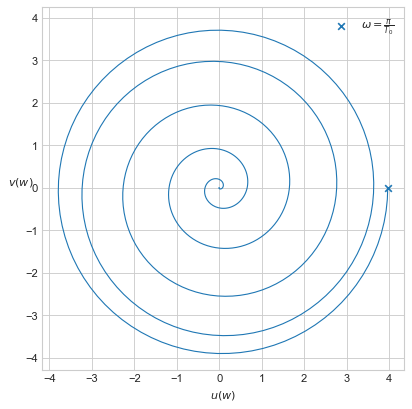

In [47]:
w_domain = np.linspace(0, np.pi/T_0, 500)
plt.figure(figsize=(6, 6), dpi=80)
plt.plot([u_hodograph(w) for w in w_domain], [v_hodograph(w) for w in w_domain], linewidth=1)
# plt.scatter(u_hodograph(w_domain[0]), v_hodograph(w_domain[0]), label='$\omega = 0$')
plt.scatter(u_hodograph(w_domain[-1]), v_hodograph(w_domain[-1]), label='$\omega = \\frac{\pi}{T_0}$', marker='x')
plt.xlabel('$u(w)$')
plt.ylabel('$v(w)$', rotation=0)
plt.legend() 
plt.axis('square')
plt.savefig(f'{IMAGES_DIR}/hodograph.png', bbox_inches='tight', dpi=300)
plt.show()

In [48]:
hodograph_signs = [int(np.sign(u_hodograph(w))*np.sign(v_hodograph(w))) for w in w_domain][1:]
no_of_quadrants = len(list(itertools.groupby(hodograph_signs, lambda x: x > 0)))

if np.abs(char_pol_ord*2 - no_of_quadrants) == 1 and np.allclose(u_hodograph(w_domain[-1])*v_hodograph(w_domain[-1]), 0):
    no_of_quadrants = char_pol_ord*2

print('Необхідна кількість квадрантів:', char_pol_ord*2)
print('Кількість пройдених квадрантів:', no_of_quadrants)

Необхідна кількість квадрантів: 24
Кількість пройдених квадрантів: 24


# Розділ 8. Алгоритми цифрового керування

## 8.1. Позиційний алгоритм

У даному алгоритмі регулятор цифрового керування виконує розрахунок повної величини
керуючого діяння у формі 
$$
u[n T_0] = K_p \left(
        e[n T_0] + \frac{T_0}{T_I} \sum_{i=1}^n e[i T_0] +
        \frac{T_D}{T_0} \left[e[n T_0] - e[(n-1)T_0]\right]
    \right)
$$
Віднявши з обох частин $u\left([n-1] T_0\right)$,
отримаємо рівняння
$$
    u\left[n T_0\right] - u\left[(n-1) T_0\right] = K_p \left(
        e\left[n T_0\right] - e\left[(n-1) T_0\right]
    \right) + 
    \frac{K_p T_0}{T_I} e\left[n T_0\right] + \\ +
    \frac{K_p T_D}{T_0} \left(
        e\left[n T_0\right] - 2e\left[(n-1) T_0\right] + e\left[(n-2) T_0\right]
    \right)
$$
яке можна записати як
$$
    u\left[n T_0\right] = u\left[(n-1) T_0\right] + 
    A_0 \cdot e\left[n T_0\right] + A_1 \cdot e\left[(n-1) T_0\right] + A_2 \cdot e\left[(n-2) T_0\right]
$$
де $A_0 = K_p \left(1 + \frac{T_0}{T_I} + \frac{T_D}{T_0}\right)$,
$A_1 = -K_p \left(1 + 2\frac{T_D}{T_0}\right)$, $A_3 = \frac{K_p T_D}{T_0}$, а похибка визначається як
$e\left[n T_0\right] = G\left[n T_0\right] - y\left[n T_0\right]$.
Отримане рівняння є зручною для програмування на комп'ютері формою вихідного рівняння.
Обчислимо значення коефіцієнтів $A_0, A_1, A_2$ для систем з розрахованими настройками ПІ-регулятора.
Оскільки $T_D = 0$, то вирази спрощуються до $A_ 0 = K_p\left(1 + \frac{T_0}{T_I}\right)$,
$A_1 = -K_p$, $A_2 = 0$.

In [49]:
A_0 = lambda _T_0, _T_I, _K_p: np.round(_K_p, 5) * (1 + np.round(_T_0, 5) / np.round(_T_I, 5))
A_1 = lambda _K_p: -np.round(_K_p, 5)

### $W_O(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1) (T_3 s + 1)}$, резонансний метод

In [50]:
print(f"A_0 = {A_0(**REGULATORS['резонансний']['3 порядок']):.5f}")
print(f"A_1 = {A_1(_K_p=REGULATORS['резонансний']['3 порядок']['_K_p']):.5f}")

A_0 = 0.16615
A_1 = -0.15495


### $W_O(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1)}$, резонансний метод

In [51]:
print(f"A_0 = {A_0(**REGULATORS['резонансний']['2 порядок']):.5f}")
print(f"A_1 = {A_1(_K_p=REGULATORS['резонансний']['2 порядок']['_K_p']):.5f}")

A_0 = 0.21592
A_1 = -0.20311


### $W_O(s) = \frac{ k e^{-\tau s}}{T_1 s + 1}$, метод прямого синтезу, $\lambda = \frac{1}{T_1}$

In [52]:
print(f"A_0 = {A_0(**REGULATORS['прямий синтез']['lambda = 1/(1 T_1)']):.5f}")
print(f"A_1 = {A_1(_K_p=REGULATORS['прямий синтез']['lambda = 1/(1 T_1)']['_K_p']):.5f}")

A_0 = 0.07675
A_1 = -0.07650


### $W_O(s) = \frac{ k e^{-\tau s}}{T_1 s + 1}$, метод прямого синтезу, $\lambda = \frac{1}{1.5 T_1}$

In [53]:
print(f"A_0 = {A_0(**REGULATORS['прямий синтез']['lambda = 1/(1.5 T_1)']):.5f}")
print(f"A_1 = {A_1(_K_p=REGULATORS['прямий синтез']['lambda = 1/(1.5 T_1)']['_K_p']):.5f}")

A_0 = 0.05658
A_1 = -0.05640


### $W_O(s) = \frac{ k e^{-\tau s}}{T_1 s + 1}$, метод прямого синтезу, $\lambda = \frac{1}{2 T_1}$

In [54]:
print(f"A_0 = {A_0(**REGULATORS['прямий синтез']['lambda = 1/(2 T_1)']):.5f}")
print(f"A_1 = {A_1(_K_p=REGULATORS['прямий синтез']['lambda = 1/(2 T_1)']['_K_p']):.5f}")

A_0 = 0.04474
A_1 = -0.04460


### $W_O(s) = \frac{ k e^{-\tau s}}{T_1 s + 1}$, метод прямого синтезу, $\lambda = \frac{1}{3 T_1}$

In [55]:
print(f"A_0 = {A_0(**REGULATORS['прямий синтез']['lambda = 1/(3 T_1)']):.5f}")
print(f"A_1 = {A_1(_K_p=REGULATORS['прямий синтез']['lambda = 1/(3 T_1)']['_K_p']):.5f}")

A_0 = 0.03160
A_1 = -0.03150


## 8.2. Швидкісний алгоритм

Швидкісний алгоритм відрізняється тим, що вихідний сигнал цифрового регулятора формується як швидкість зміни керуючого діяння.
На кожному періоді квантування визначається приріст керуючого діяння
$\Delta u\left[n T_0\right] = u\left[n T_0\right] - u\left[(n-1) T_0\right]$,
тому
$$
    \Delta u\left[n T_0\right] = 
    A_0 \cdot e\left[n T_0\right] + A_1 \cdot e\left[(n-1) T_0\right] + A_2 \cdot e\left[(n-2) T_0\right]
$$

# 9. Моделювання замкнених систем

In [56]:
symbols = dict(zip(['z_inv', 'T_0', 'T_1', 'T_2', 'T_3', 'k', 'tau', 'K_p', 'T_I', 'd'], sp.symbols("u, T_0, T_1, T_2, T_3, k, \\tau, K_p, T_I, d")))

A_0_val = lambda _T_0, _T_I, _K_p: np.round(_K_p, 5) * (1 + np.round(_T_0, 5) / np.round(_T_I, 5))
A_1_val = lambda _K_p: -np.round(_K_p, 5)

def modelSystem(W, values, modeling_steps, input_G='step'):
    values[symbols['d']] = int(np.floor(values[symbols['tau']] / values[symbols['T_0']]))
    z_inv = symbols['z_inv']
    print('running simplify...')
    W_cont_simpl = sp.simplify(W, ratio=3)
    num_simpl = sp.fraction(W_cont_simpl)[0]
    denum_simpl = sp.fraction(W_cont_simpl)[1]
    num_poly = sp.Poly(num_simpl.subs(values), z_inv)
    denum_poly = sp.Poly(denum_simpl.subs(values), z_inv)

    num_coefs = {
    -p: 
        num_poly.coeff_monomial(z_inv**p)/denum_poly.coeff_monomial(z_inv**0) 
        for p in range(num_poly.degree()+1)
        if num_poly.coeff_monomial(z_inv**p) != 0
    }
    denum_coefs = {
        -p: 
            denum_poly.coeff_monomial(z_inv**p)/denum_poly.coeff_monomial(z_inv**0) 
            for p in range(denum_poly.degree()+1)
            if denum_poly.coeff_monomial(z_inv**p) != 0
    }

    A_0 = A_0_val(_T_0=values[symbols['T_0']], _T_I=values[symbols['T_I']], _K_p=values[symbols['K_p']])
    A_1 = A_1_val(_K_p=values[symbols['K_p']])

    d_val = values[symbols['d']]

    y_out = [0] * (d_val + 3)
    u = [0]
    if input_G == 'step':
        G_in = [1] + [1] * (d_val + 2)
    elif input_G == 'impulse':
        G_in = [1] + [0] * (d_val + 2)
    e = [G_in[n] - y_out[n] for n in range(d_val+3)]

    for n in range(1, d_val+3):
        u.append(u[n-1] + A_0 * e[n] + A_1 * e[n-1])

    print('modeling...')
    for n in range(d_val+3, d_val+3+modeling_steps):
        y_out.append(
            sum([
                -denum_coefs[lag]*y_out[n + lag] for lag in denum_coefs if lag != 0
            ]) + 
            sum([
               num_coefs[lag]*u[n + lag] for lag in num_coefs
            ])
        )
        if input_G == 'step':
            G_in.append(1)
        elif input_G == 'impulse':
            G_in.append(0)
        
        e.append(G_in[n] - y_out[n])
        u.append(u[n-1] + A_0 * e[n] + A_1 * e[n-1])
    
    t_discr = np.arange(len(y_out))*values[symbols['T_0']]
    interp = interp1d(t_discr, y_out, kind='zero')
    t_domain = np.linspace(0, t_discr.max(), modeling_steps*2)
    return t_domain, interp(t_domain)

## 9.1. Випадок $W_O(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1) (T_3 s + 1)}$

running simplify...
modeling...


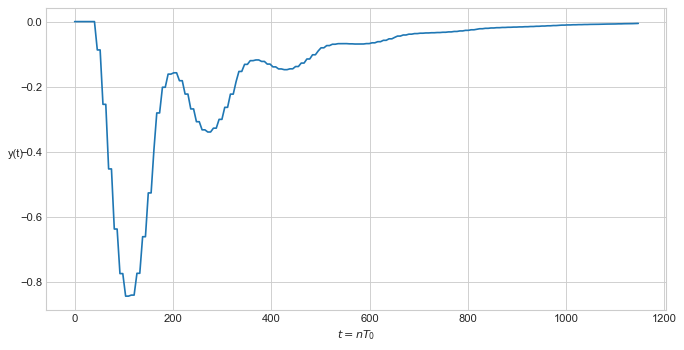

running simplify...
modeling...


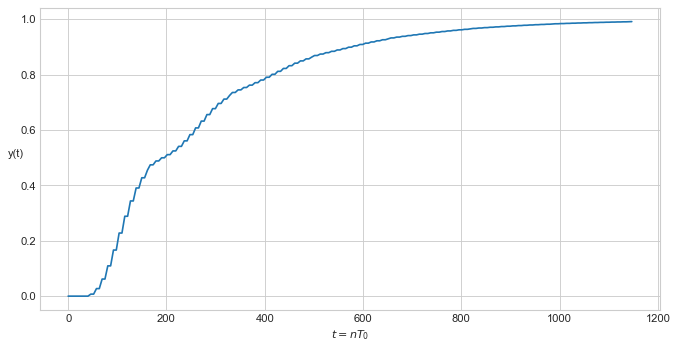

In [57]:
W_cont = (1 - symbols['z_inv']) * symbols['k'] * symbols['z_inv'] ** (symbols['d']+1) * (
    1 / (1 - symbols['z_inv']) 
    - (symbols['T_1']**2 / ((symbols['T_1'] - symbols['T_2']) * (symbols['T_1'] - symbols['T_3']))) 
        * sp.exp(symbols['tau']/symbols['T_1'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_1']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_1']) * symbols['z_inv']) 
    + (symbols['T_2']**2 / ((symbols['T_1'] - symbols['T_2']) * (symbols['T_2'] - symbols['T_3']))) 
        * sp.exp(symbols['tau']/symbols['T_2'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_2']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_2']) * symbols['z_inv']) 
    + (symbols['T_3']**2 / ((symbols['T_1'] - symbols['T_3']) * (symbols['T_3'] - symbols['T_2']))) 
        * sp.exp(symbols['tau']/symbols['T_3'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_3']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_3']) * symbols['z_inv']) 
)

values = {
    symbols['T_0']: np.round(REGULATORS['резонансний']['3 порядок']['_T_0'], 5),
    symbols['K_p']: np.round(REGULATORS['резонансний']['3 порядок']['_K_p'], 5),
    symbols['T_I']: np.round(REGULATORS['резонансний']['3 порядок']['_T_I'], 5),
    symbols['k']: k,
    symbols['T_1']: T_1,
    symbols['T_2']: T_2,
    symbols['T_3']: T_3,
    symbols['tau']: tau
}

for input_type in ['impulse', 'step']:
    plt.figure(figsize=(10, 5), dpi=80)
    t, y = modelSystem(W_cont, values, modeling_steps=100, input_G=input_type)
    plt.plot(t, y)
    plt.xlabel('$t = nT_0$')
    plt.ylabel('y(t)', rotation=0)
    plt.savefig(f'{IMAGES_DIR}/transient_process_final_9_1_{input_type}.png', bbox_inches='tight', dpi=300)
    plt.show()

## 9.2. Випадок $W_O(s) = \frac{ k e^{-\tau s}}{(T_1 s + 1) (T_2 s + 1)}$

running simplify...
modeling...


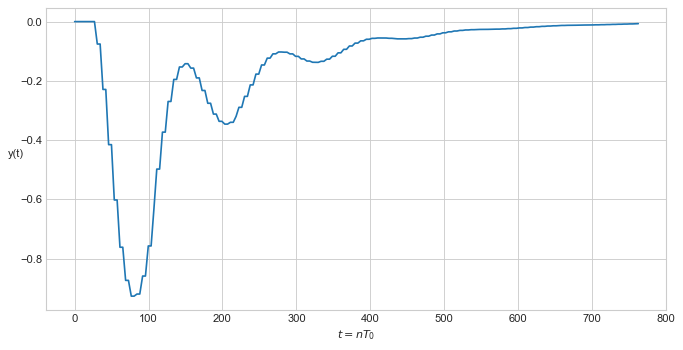

running simplify...
modeling...


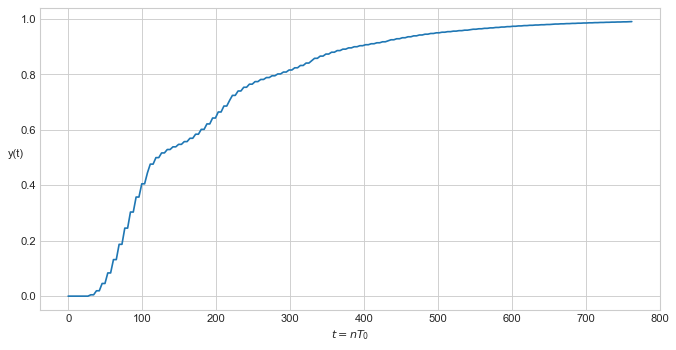

In [58]:
W_cont = (1 - symbols['z_inv']) * symbols['k'] * symbols['z_inv'] ** (symbols['d']+1) * (
    1 / (1 - symbols['z_inv']) 
    - (symbols['T_1'] / (symbols['T_1'] - symbols['T_2'])) 
        * sp.exp(symbols['tau']/symbols['T_1'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_1']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_1']) * symbols['z_inv']) 
    + (symbols['T_2'] / (symbols['T_1'] - symbols['T_2'])) 
        * sp.exp(symbols['tau']/symbols['T_2'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_2']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_2']) * symbols['z_inv'])
)

values = {
    symbols['T_0']: np.round(REGULATORS['резонансний']['2 порядок']['_T_0'], 5),
    symbols['K_p']: np.round(REGULATORS['резонансний']['2 порядок']['_K_p'], 5),
    symbols['T_I']: np.round(REGULATORS['резонансний']['2 порядок']['_T_I'], 5),
    symbols['k']: k,
    symbols['T_1']: T_1,
    symbols['T_2']: T_2,
    symbols['tau']: tau
}

for input_type in ['impulse', 'step']:
    plt.figure(figsize=(10, 5), dpi=80)
    t, y = modelSystem(W_cont, values, modeling_steps=100, input_G=input_type)
    plt.plot(t, y)
    plt.xlabel('$t = nT_0$')
    plt.ylabel('y(t)', rotation=0)
    plt.savefig(f'{IMAGES_DIR}/transient_process_final_9_2_{input_type}.png', bbox_inches='tight', dpi=300)
    plt.show()

## 9.3. Випадок $W_O(s) = \frac{ k e^{-\tau s}}{T_1 s + 1}$

lambda = 1/(1 T_1) = 0.0286
running simplify...
modeling...
lambda = 1/(1.5 T_1) = 0.0190
running simplify...
modeling...
lambda = 1/(2 T_1) = 0.0143
running simplify...
modeling...
lambda = 1/(3 T_1) = 0.0095
running simplify...
modeling...


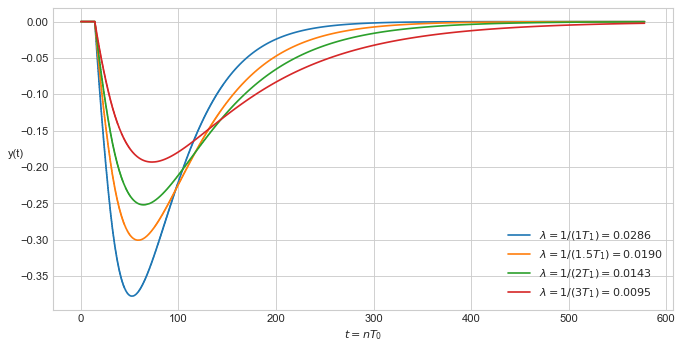

lambda = 1/(1 T_1) = 0.0286
running simplify...
modeling...
lambda = 1/(1.5 T_1) = 0.0190
running simplify...
modeling...
lambda = 1/(2 T_1) = 0.0143
running simplify...
modeling...
lambda = 1/(3 T_1) = 0.0095
running simplify...
modeling...


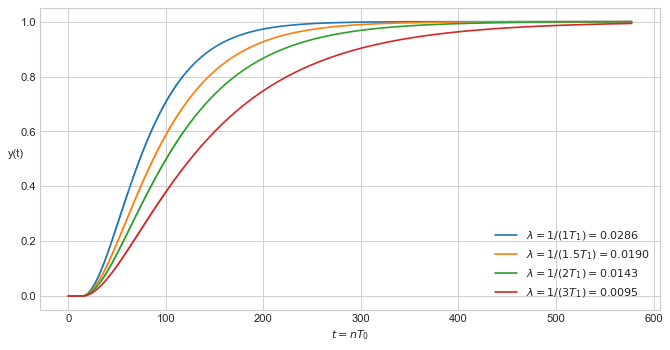

In [59]:
W_cont = W_cont = (1 - symbols['z_inv']) * symbols['k'] * symbols['z_inv'] ** (symbols['d']+1) * (
    1 / (1 - symbols['z_inv']) - 
    sp.exp(symbols['tau']/symbols['T_1'] - (symbols['d']+1) * symbols['T_0'] / symbols['T_1']) / (1 - sp.exp(-symbols['T_0'] / symbols['T_1']) 
    * symbols['z_inv'])
)

def K_p_opt(l):
    return (1 - np.exp(-T_0 * l))/(k * (np.exp(T_0/T_1)-1) * (1 + d * (1 - np.exp(-T_0 * l))))
    
for input_type in ['impulse', 'step']:
    plt.figure(figsize=(10, 5), dpi=80)
    for multpl in [1, 1.5, 2, 3]:
        print(f'lambda = 1/({multpl} T_1) = {1/(multpl * T_1):.4f}')
        values = {
            symbols['T_0']: np.round(REGULATORS['прямий синтез'][f'lambda = 1/({multpl} T_1)']['_T_0'], 4),
            symbols['K_p']: np.round(REGULATORS['прямий синтез'][f'lambda = 1/({multpl} T_1)']['_K_p'], 4),
            symbols['T_I']: np.round(REGULATORS['прямий синтез'][f'lambda = 1/({multpl} T_1)']['_T_I'], 4),
            symbols['k']: k,
            symbols['T_1']: T_1,
            symbols['tau']: tau
        }
        t, y = modelSystem(W_cont, values, modeling_steps=5000, input_G=input_type) # or input_G='step'
        plt.plot(t, y, label=f'$\lambda = 1/({multpl} T_1) = {1/(multpl * T_1):.4f}$')
    plt.xlabel('$t = nT_0$')
    plt.ylabel('y(t)', rotation=0)
    plt.legend()
    plt.savefig(f'{IMAGES_DIR}/transient_process_final_9_3_{input_type}.png', bbox_inches='tight', dpi=300)
    plt.show()